<a href="https://colab.research.google.com/github/uchaiaye53/ML-Lab/blob/main/Final-lab-assignments/ML_lab_2017831053.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import os
from PIL import Image
import cv2
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix,classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

**Load Dataset** 

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/CNN_dataset.zip', 'r') as zipObj:
     zipObj.extractall('dataset')

In [8]:
data = '/content/dataset/CNN_dataset'
classNames = sorted([x for x in os.listdir(data) if os.path.isdir(os.path.join(data, x))])
classCount = len(classNames)
imageFiles = [[os.path.join(data, className, x) 
                for x in os.listdir(os.path.join(data, className))] 
               for className in classNames]
imageFileList = []
imageLabelList = []
for i, className in enumerate(classNames):
    imageFileList.extend(imageFiles[i])
    imageLabelList.extend([i] * len(imageFiles[i]))

print('Total images:', len(imageFileList))
print("LabelNames:", classNames)

Total images: 50000
LabelNames: ['AbdomenCT', 'CXR', 'ChestCT', 'Hand', 'HeadCT']


**Sample Dataset** 

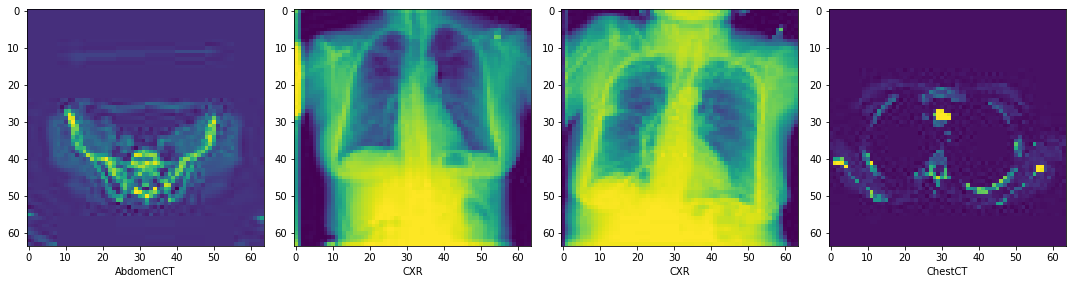

In [9]:
plt.subplots(1, 4, figsize=(15, 15))

for i,j in enumerate(np.random.randint(len(imageFileList), size=4)):
    img = Image.open(imageFileList[j])
    arr = np.array(img)
    plt.subplot(1, 4, i + 1)
    plt.xlabel(classNames[imageLabelList[j]])
    plt.imshow(arr)
plt.tight_layout()
plt.show()

**Split Data for training and testing**

In [10]:
X_train, Y_train = [], []
X_test, Y_test = [], []

DataFraction = 0.20
for i in range(len(imageFileList)):
    ran = np.random.random()
    if ran > DataFraction:
        X_train.append(cv2.imread(imageFileList[i]))
        Y_train.append(imageLabelList[i])
    else:
        X_test.append(cv2.imread(imageFileList[i]))
        Y_test.append(imageLabelList[i])
        

print("Training data =",len(X_train))
print("Testing data =",len(X_test))

Training data = 39993
Testing data = 10007


In [11]:
Xtrain = np.array(X_train).astype('float32') / 255
Xtest = np.array(X_test).astype('float32') / 255
Ytrain = to_categorical(np.array(Y_train), classCount)
Ytest = to_categorical(np.array(Y_test), classCount)

In [12]:
print("traindata X shape:", Xtrain.shape, "traindata Y shape:", Ytrain.shape)

traindata X shape: (39993, 64, 64, 3) traindata Y shape: (39993, 5)


**Building Deep Learning Model(CNN)**

In [13]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [14]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

**Training the model**

In [16]:
modelLog=model.fit(Xtrain, Ytrain, batch_size=60, epochs=10, validation_split=.15, verbose=1)

Epoch 1/10
567/567 [==============================] - 17s 12ms/step - loss: 0.0712 - accuracy: 0.9776 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 2/10
567/567 [==============================] - 5s 10ms/step - loss: 0.0226 - accuracy: 0.9943 - val_loss: 4.4818e-05 - val_accuracy: 1.0000
Epoch 3/10
567/567 [==============================] - 6s 10ms/step - loss: 0.0075 - accuracy: 0.9978 - val_loss: 3.7634e-04 - val_accuracy: 1.0000
Epoch 4/10
567/567 [==============================] - 6s 11ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 5.4053e-04 - val_accuracy: 0.9998
Epoch 5/10
567/567 [==============================] - 6s 10ms/step - loss: 0.0142 - accuracy: 0.9959 - val_loss: 0.0024 - val_accuracy: 0.9995
Epoch 6/10
567/567 [==============================] - 6s 10ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 6.1554e-06 - val_accuracy: 1.0000
Epoch 7/10
567/567 [==============================] - 6s 10ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0034 - val

**Evaluate the model**

In [17]:
testPredict = model.predict(Xtest)
predicted = np.argmax(testPredict, axis=1)
actual = np.argmax(Ytest, axis=1)
confusionMatrix = confusion_matrix(actual, predicted)

print(confusionMatrix)

313/313 [==============================] - 1s 3ms/step
[[2042    0    0    0    0]
 [   0 2018    3    0    0]
 [   0    0 1978    0    0]
 [   0    5    0 1989    3]
 [   0    0    0    0 1969]]


In [18]:
print(classification_report(actual, predicted, target_names=classNames,digits=4))

              precision    recall  f1-score   support

   AbdomenCT     1.0000    1.0000    1.0000      2042
         CXR     0.9975    0.9985    0.9980      2021
     ChestCT     0.9985    1.0000    0.9992      1978
        Hand     1.0000    0.9960    0.9980      1997
      HeadCT     0.9985    1.0000    0.9992      1969

    accuracy                         0.9989     10007
   macro avg     0.9989    0.9989    0.9989     10007
weighted avg     0.9989    0.9989    0.9989     10007

